In [1]:
import numpy as np
from math import *
import cv2
import time
import os,sys
import matplotlib.pyplot as plt

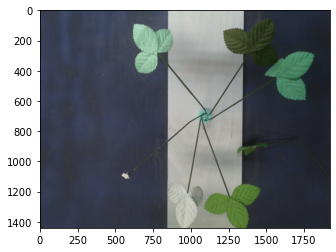

In [29]:
path = 'IMG_data/'
img = cv2.imread(path + str(1) + '.jpg',1)
plt.imshow(img) # (1440, 1920, 3)

[50 56 69]
[ 0  6 19]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fb976ba3520>)

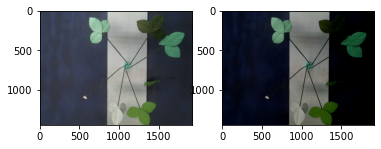

In [37]:
path = 'IMG_data/'
img = cv2.imread(path + str(1) + '.jpg',1)
plt.imshow(img) # (1440, 1920, 3)
img.shape
height = img.shape[0]
width = img.shape[1]
left, right = int(0.2 * width), int(0.8 * width)
top, down = int(0.2 * height), int(0.8 * height)
# region = [top : down, left : right]
img = cv2.rectangle(img,(left,top),(right,down),(0,255,0),3)
print(img[1,1,:])
plt.subplot(1,2,1),plt.imshow(img)
# img = img - np.ones((height, width, 3), dtype = np.uint8) * 50
img = cv2.subtract(img, np.ones(img.shape, dtype = np.uint8) * 50)
print(img[1,1,:])
plt.subplot(1,2,2),plt.imshow(img)

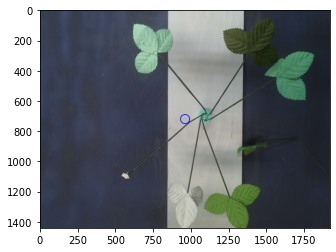

In [48]:
path = 'IMG_data/'
img = cv2.imread(path + str(1) + '.jpg',1)
center_coordinates = (int(width / 2), int(height / 2))
radius = 30
color = (0, 0, 255)
thickness = 3
img = cv2.circle(img, center_coordinates, radius, color, thickness) 
plt.imshow(img)

# Discovered that decrease ligth strength could reinforce the difference between white and green leaves

circles:
 [row col radius]:
 [[278  68  31]
 [376 166  31]
 [184 170  34]
 [278 262  30]
 [324 138  49]
 [184 266  32]
 [374  74  32]]
center of circle : 278 68
radius : 31


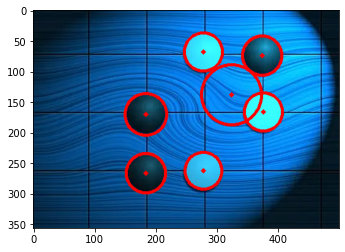

In [97]:
import cv2
import numpy as np
import math

def seg_circle(img):
    h, w = img.shape[:2]
    result = np.zeros([h, w, 3])
    circles = detect_circle(img)
    if not isinstance(circles, np.ndarray):
        return None
    print('circles:\n [row col radius]:\n', circles)
    print("center of circle :", circles[0][0], circles[0][1])
    print("radius :", circles[0][2])
    for i in circles[:]:
        cv2.circle(img, (i[0], i[1]), i[2], (255, 0, 0), 3)  # circle
        cv2.circle(img, (i[0], i[1]), 2, (255, 0, 0), 3)  # center of circle
    plt.imshow(img)
    return True
#     cv2.imwrite('result.jpg', img)


def detect_circle(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gaussian = cv2.GaussianBlur(gray, (3, 3), 0)
    circles_origin = cv2.HoughCircles(gaussian, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=200, param2=30, minRadius=0, maxRadius=100)    
    if not isinstance(circles_origin, np.ndarray):
        return None
    circles = circles_origin[0, :, :]
    circles = np.uint16(np.around(circles))
    return circles


def distance(x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2 + (y1 - y2)**2)

def main():
    img = cv2.imread(path + 'chess.jpg')
    result = seg_circle(img)
    if result == None:
        print('There is no circle-like object found')

if __name__ == '__main__':
    main()

There is no circle-like object found


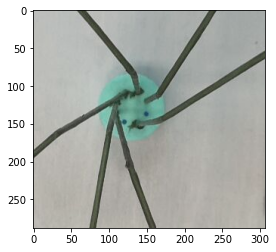

In [101]:
# Try for region recognization
path = 'IMG_data/'
img = cv2.imread(path + str(1) + '.jpg',1)
left, right = int(0.5 * width), int(0.66 * width)
top, down = int(0.4 * height), int(0.6 * height)
region = img[top:down, left:right]
plt.imshow(region)

result = seg_circle(region)
if result == None:
    print('There is no circle-like object found')

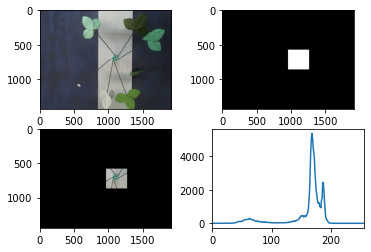

In [107]:
# utilize mask，draw region histgram
path = 'IMG_data/'
img = cv2.imread(path + str(1) + '.jpg',1)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[top:down, left:right] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[2],mask,[256],[0,256]) # 2:red channel

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_mask) # plt.legend('Hist_full', 'Hist_mask')
plt.xlim([0,256])

plt.show()

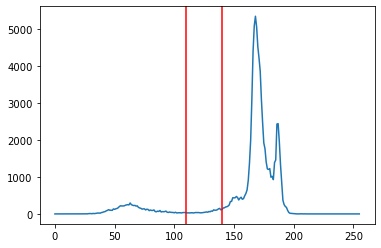

In [128]:
plt.plot(hist_mask)
back_thre = 140
stem_thre = 110
plt.axvline(x = back_thre, color='r', linestyle='-')
plt.axvline(x = stem_thre, color='r', linestyle='-')
# stem | base | background(wood board)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fb98686e940>)

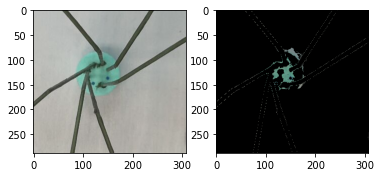

In [129]:
path = 'IMG_data/'
img = cv2.imread(path + str(1) + '.jpg',1)
left, right = int(0.5 * width), int(0.66 * width)
top, down = int(0.4 * height), int(0.6 * height)
region = img[top:down, left:right]
#
plt.subplot(1,2,1), plt.imshow(region)
for i in range(region.shape[0]):
    for j in range(region.shape[1]):
        if region[i,j,2] > back_thre or region[i,j,2] < stem_thre:
            region[i,j,:] = 0
plt.subplot(1,2,2), plt.imshow(region)